<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/tf_04_approximation_fonction_RELU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


**Julien VALENTIN**, **mars 2022**, selon les T.P de [Bruno DESPRES](https://www.ljll.math.upmc.fr/despres/)

> https://www.ljll.math.upmc.fr/~despres/BD_fichiers/ReLU.py

In [2]:
from matplotlib import pyplot

import numpy

import tensorflow
from tensorflow import keras
from keras import backend as K
from keras import initializers
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D
from keras.utils.generic_utils import get_custom_objects

# Introduction

Dans ce notebook, on cherche à approcher des fonctions continues par des interpolations grâce à des unités linéaires rectifiées, `RELU`.

# Paramètres numériques

In [3]:
N  = 40      # nombre de points de la discrétisation
dx = 1./N    # pas d'espace

# Fonctions à approcher

In [4]:
def u(x: float) -> float:
    "Fonction lisse périodique"
    return 1 - numpy.cos( 2*numpy.pi * x )

In [5]:
def d2u(x: float) -> float:
    "Dérivée seconde spatiale de u"
    return 4 * numpy.pi**2 * numpy.cos( 2*numpy.pi * x)

# Construction du modèle

In [6]:
# dtype=None est nécessaire car dtype est passé par tensorflow lors des appels.
# les encapsulations vectorielles sont là pour des compatibilités de dimensions : (1,N)

def init_W0(shape: int, dtype=None) -> K.constant:
    "Initialise le vecteur de biais W0"
    W0 = numpy.ones(N)
    W0 = numpy.array([W0])    # nécessaire pour avoir shape = (1,N)
    return K.constant(W0)

def init_W1(shape: int, dtype=None) -> K.constant:
    "Initialise la transposée de W1"
    W1 = numpy.array([d2u(i*dx)*dx for i in range(N)])
    W1 = numpy.array([W1])
    return K.constant(W1.T)

def init_b0(shape: int, dtype=None) -> K.constant:
    "Initialise le vecteur de biais"
    b0 = -numpy.linspace(0, 1, N)
    return K.constant(b0)

In [7]:
model = Sequential()

model.add(
          Dense(N,
                input_dim=1,
                name="in_layer",
                kernel_initializer=init_W0,
                use_bias=True,
                bias_initializer=init_b0,
                activation="relu"
               )
)

model.add(
          Dense(1,
                name="out_layer",
                kernel_initializer=init_W1,
                use_bias=False,
                activation='linear',
                )
)

# Approximation de $u$

In [8]:
x   = numpy.linspace(0, 1, N)
y_p = model.predict(x)

# Visualisation

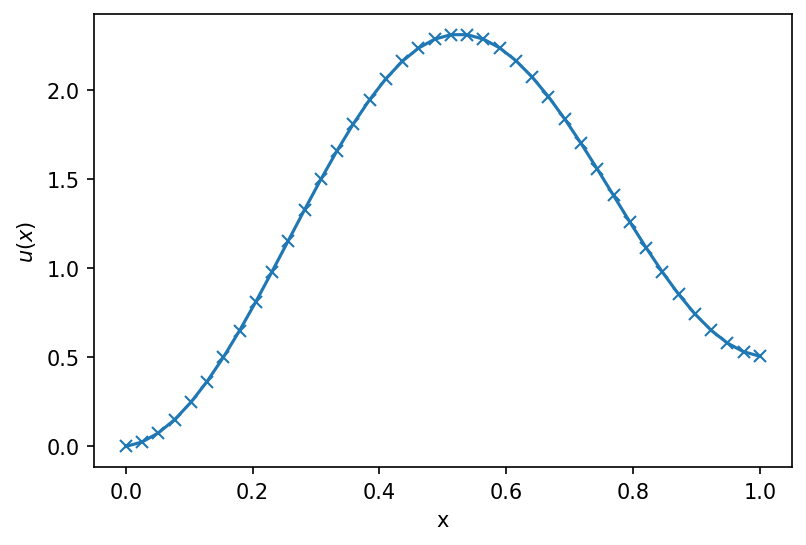

In [9]:
pyplot.figure(dpi=150)
pyplot.plot(x, y_p, marker="x")
pyplot.xlabel("x")
pyplot.ylabel("$u(x)$")
pyplot.show()